Materials for my reference:

https://www.geeksforgeeks.org/weighted-logistic-regression-for-imbalanced-dataset/

# Index
1. [Import libraries and load data](#Import-libraries-and-load-data)

2. [Drop the id column](#Drop-the-id-column)

3. [Check the number of rows to decide the ratio of train to test](#Check-the-number-of-rows-to-decide-the-ratio-of-train-to-test)

4. [Train-test split](#Train-test-split)

5. [Normalize the data](#Normalize-the-data)

6. [Logistic regression #1 (without feature selection and extra weight on target = 1 examples)](#Logistic-regression-1-without-feature-selection-and-extra-weight-on-target--1-examples)

7. [Logistic regression #2 with extra weight on target = 1 examples (without feature selection)](#Logistic-regression-2-with-extra-weight-on-target--1-examples-without-feature-selection)

8. [Logistic regression #3 with extra weight on target = 1 examples AND feature selection](#Logistic-regression-3-with-extra-weight-on-target--1-examples-AND-feature-selection)

9. [Conclusion](#Conclusion)

## Import libraries and load data

In [3]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
# Set the display option to show all rows (or adjust to your desired number)
pd.set_option('display.max_rows', 10)  # Display all rows in the output
pd.set_option('display.max_columns', 10)  # Display all columns (if needed)

In [4]:
df= pd.read_csv('C:/Users/Dell/Desktop/Mlda/Pronova Project/sdptrain_cleaned_encoded.csv')
df.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,...,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,...,0,0,0,0,0
1,9,0,1,7,0,...,0,0,0,0,0
2,13,0,5,9,0,...,0,0,0,0,0
3,16,0,0,2,1,...,0,0,0,0,1
4,17,0,0,0,1,...,0,0,0,0,0


## Drop the id column
The id column is unrelated to our prediction

In [6]:
df = df.drop(columns=['id'])
df.head()

,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,...,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,2,5,0,1,...,0,0,0,0,0
1,0,1,7,0,0,...,0,0,0,0,0
2,0,5,9,0,0,...,0,0,0,0,0
3,0,0,2,1,0,...,0,0,0,0,1
4,0,0,0,1,0,...,0,0,0,0,0


## Check the number of rows to decide the ratio of train to test

In [8]:
df.shape

(594444, 194)

594444 examples, quite a lot thus we can do a 20-80 split of data

## Train-test split

In [11]:
y = df['target']  # Target variable
# Specifying the feature columns
X = df.drop(columns='target')  # All columns except 'Target'
display(y)
display(X)

0         0
1         0
2         0
3         0
4         0
         ..
594439    0
594440    0
594441    0
594442    0
594443    0
Name: target, Length: 594444, dtype: int64

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,2,5,0,1,0,...,0,0,0,0,0
1,1,7,0,0,1,...,0,0,0,0,0
2,5,9,0,0,1,...,0,0,0,0,0
3,0,2,1,0,0,...,0,0,0,0,1
4,0,0,1,0,0,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
594439,3,10,0,0,0,...,0,0,0,0,0
594440,5,3,0,0,0,...,0,0,0,0,0
594441,1,10,1,0,0,...,0,0,0,0,0
594442,5,3,0,0,1,...,0,1,0,0,0


### Stratify according to the target column since we wish the distribution of 1 and 0 to be the same for both test and train

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42)
print(X_train.shape)
print(X_test.shape)

(475555, 193)
(118889, 193)


## Normalize the data

Resources for data scaling techniques: https://www.geeksforgeeks.org/data-normalization-with-python-scikit-learn/#2-standardization-zscore-normalization

For logistic regression, the best scaling method depends on the characteristics of your dataset. Generally, StandardScaler is the most commonly used because logistic regression assumes a Gaussian-like distribution of features.

Why Scaling Matters for Logistic Regression

1. Optimization Speed: Logistic regression uses gradient descent for optimization, which benefits from scaled features as it reduces numerical instability and improves convergence.
 
2. Regularization: If you're using regularization (L1, L2), scaling ensures that penalties are applied uniformly across all features.

In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)       # Transform test data only

print("\nScaled Training Set (X_train):")
print(X_train_scaled)

print("\nScaled Test Set (X_test):")
print(X_test_scaled)


Scaled Training Set (X_train):
[[ 0.05126163 -0.8979731  -0.80682646 ... -0.05938164 -0.20684641
  -0.40848162]
 [-0.95733266  1.69742676  1.2394239  ... -0.05938164 -0.20684641
  -0.40848162]
 [-0.95733266 -1.26874451 -0.80682646 ... -0.05938164 -0.20684641
  -0.40848162]
 ...
 [-0.45303552 -0.52720169 -0.80682646 ... -0.05938164 -0.20684641
  -0.40848162]
 [-0.95733266 -1.26874451  1.2394239  ... -0.05938164 -0.20684641
   2.44809055]
 [-0.45303552 -1.63951592 -0.80682646 ... -0.05938164 -0.20684641
  -0.40848162]]

Scaled Test Set (X_test):
[[-0.45303552  1.32665535 -0.80682646 ... -0.05938164 -0.20684641
  -0.40848162]
 [-0.45303552 -1.26874451  1.2394239  ... -0.05938164 -0.20684641
  -0.40848162]
 [ 1.05985592  1.32665535  1.2394239  ... -0.05938164  4.83450488
  -0.40848162]
 ...
 [ 0.55555878  0.58511253 -0.80682646 ... -0.05938164 -0.20684641
  -0.40848162]
 [ 1.56415307  1.69742676 -0.80682646 ... -0.05938164 -0.20684641
   2.44809055]
 [ 2.57274736 -1.26874451 -0.80682646 .

The distinction between fit_transform and transform lies in their purpose and when they should be used during the preprocessing pipeline.

1. fit_transform

Purpose: Combines two steps:

fit: Calculates the necessary statistics (e.g., mean and standard deviation for StandardScaler) from the data.

transform: Applies the transformation using the computed statistics.

When to Use:  When you're working with the training dataset, as you need to compute the scaling parameters based on this data.

2. transform

Purpose: Only applies the transformation using the statistics already learned from the training data.

When to Use: For datasets where you don't want to recompute the statistics, such as the test set, to ensure consistent scaling across both train and test datasets. Avoids data leakage from the test set into the training process.

## Logistic regression #1 (without feature selection and extra weight on target = 1 examples)

In [18]:
# Initialize and train Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model1.predict(X_test_scaled)

# Initialize an empty list to store the metrics
metrics = []

# Calculate accuracy, precision, and recall
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)

metrics.append({
    'accuracy': accuracy1,
    'precision': precision1,
    'recall': recall1
})

# Print the metrics
print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Precision: 0.00
Recall: 0.00

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114565
           1       0.00      0.00      0.00      4324

    accuracy                           0.96    118889
   macro avg       0.48      0.50      0.49    118889
weighted avg       0.93      0.96      0.95    118889


Confusion Matrix:
[[114565      0]
 [  4324      0]]


C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3new\Lib\site-packag

### Findings:
The model is biased towards predicting the negative class (class 0) and fails to identify any positive instances (class 1). This indicates the model needs improvement, especially in recognizing positive instances, and likely requires adjustments such as:

Tuning the decision threshold.

Handling class imbalance if applicable.

Exploring other techniques or models that perform better on both classes.


Precision Ill-Defined:

Precision is a metric that calculates how many of the predicted positive samples are actually true positives:
 
However, the model hasn't predicted any positive samples (True Positives or False Positives). This makes precision undefined because you cannot divide by zero (no predicted positives).

## Logistic regression #2 with extra weight on target = 1 examples (without feature selection)

In [21]:
# Initialize and train a Logistic Regression model with class weights
model2 = LogisticRegression(class_weight='balanced')  # Automatically balance class weights
model2.fit(X_train_scaled, y_train)

# Make predictions
y_pred2 = model2.predict(X_test_scaled)


# Calculate accuracy, precision, and recall for the weighted model
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)

metrics.append({
    'accuracy': accuracy2,
    'precision': precision2,
    'recall': recall2
})

# Print the metrics for the weighted model
print(f"Accuracy (Weighted Model): {accuracy2:.2f}")
print(f"Precision (Weighted Model): {precision2:.2f}")
print(f"Recall (Weighted Model): {recall2:.2f}")

# Print the classification report and confusion matrix for the weighted model
print("\nClassification Report (Weighted Model):")
print(classification_report(y_test, y_pred2))

print("\nConfusion Matrix (Weighted Model):")
print(confusion_matrix(y_test, y_pred2))

Accuracy (Weighted Model): 0.61
Precision (Weighted Model): 0.05
Recall (Weighted Model): 0.55

Classification Report (Weighted Model):
              precision    recall  f1-score   support

           0       0.97      0.61      0.75    114565
           1       0.05      0.55      0.09      4324

    accuracy                           0.61    118889
   macro avg       0.51      0.58      0.42    118889
weighted avg       0.94      0.61      0.73    118889


Confusion Matrix (Weighted Model):
[[70185 44380]
 [ 1948  2376]]


For a binary classification problem, where there are two classes (class 0 and class 1), the weight for each class is calculated using the following formula:
Suppose you have a binary classification problem with the following class distribution:

##### Class 0 (Negative): 1000 samples
##### Class 1 (Positive): 100 samples
##### The total number of samples 
##### n=1000+100=1100, and the number of classes k=2.

Weight for Class 0 (Negative):

##### 𝑤0 = 1100/(2×1000) = 0.55

Weight for Class 1 (Positive):

##### 𝑤1 = 1100/(2×100) = 5.5

By assigning a higher weight to the minority class, the model will "pay more attention" to the minority class during training. The model will effectively treat errors in the minority class as more costly, forcing it to better learn the characteristics of that class.

In cases of severe class imbalance, the model can become biased toward the majority class, as it will naturally minimize the error on the majority class to achieve a good overall performance. By using class weights, we can adjust this bias and ensure that the model is encouraged to better identify instances from the minority class.

### Findings: 
The accuracy is 61%, but this is not a good indicator given the low precision and recall.

The model has a low precision (5%), meaning that most of the positive predictions are incorrect (false positives). This could be a sign that the model is biased toward predicting negatives or that the dataset is highly imbalanced.

The recall of 55% indicates that the model detects a little over half of the actual positive instances, but misses a substantial number.

The model is biased towards predicting the majority class (negative class in this case). Techniques like class weighting, resampling (oversampling the minority class or undersampling the majority class), or adjusting thresholds might help improve these metrics.

## Logistic regression #3 with extra weight on target = 1 examples AND feature selection
Go back to the dataset before splitting, and analyze the correlation between every feature and target

In [25]:
target_col = 'target'
feature_cols = [col for col in df.columns if col != target_col]

# Calculate correlations
correlations = df[feature_cols].corrwith(df[target_col])

# Sort correlations by absolute value in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Set the display option to show all rows (or adjust to your desired number)
pd.set_option('display.max_rows', None)  # Display all rows in the output
pd.set_option('display.max_columns', None)  # Display all columns (if needed)

# Display the results
print("Feature Correlations with Target:")
display(sorted_correlations)

Feature Correlations with Target:


ps_car_13            0.053813
ps_car_12            0.038632
ps_ind_17_bin        0.036655
ps_reg_02            0.035105
ps_ind_07_bin        0.034273
ps_ind_06_bin        0.033889
ps_car_02_cat_1      0.031548
ps_car_15            0.027644
ps_ind_16_bin        0.027479
ps_car_01_cat_7      0.026719
ps_car_04_cat_9      0.024629
ps_car_09_cat_1      0.024472
ps_reg_01            0.023505
ps_ind_15            0.021318
ps_car_08_cat_1      0.020430
ps_car_01_cat_11     0.020231
ps_ind_01            0.018478
ps_car_11_cat_104    0.018257
ps_car_01_cat_9      0.018172
ps_car_06_cat_9      0.017231
ps_car_04_cat_1      0.015844
ps_car_06_cat_15     0.015282
ps_car_11_cat_41     0.015240
ps_car_04_cat_8      0.013713
ps_car_06_cat_11     0.013263
ps_car_06_cat_17     0.013230
ps_ind_08_bin        0.012886
ps_car_01_cat_6      0.012081
ps_car_06_cat_13     0.011173
ps_car_04_cat_2      0.011141
ps_car_11_cat_103    0.010757
ps_car_11_cat_99     0.010248
ps_ind_04_cat_1      0.010187
ps_car_06_

#### Let's set the arbitrary threshold to 0.03, thus prepare the new dataframe:

In [27]:
columns_to_extract = [
    'ps_car_13', 'ps_car_12', 'ps_ind_17_bin', 'ps_reg_02', 
    'ps_ind_07_bin', 'ps_ind_06_bin', 'ps_car_02_cat_1', 'target'
]

# Slice the DataFrame to get only the specified columns
df_sliced = df[columns_to_extract]

# Set the display option to show all rows (or adjust to your desired number)
pd.set_option('display.max_rows', 10)  # Display all rows in the output
pd.set_option('display.max_columns', 10)  # Display all columns (if needed)

# Display the sliced DataFrame
display(df_sliced.head())
print(df_sliced.shape)

,ps_car_13,ps_car_12,ps_ind_17_bin,ps_reg_02,ps_ind_07_bin,ps_ind_06_bin,ps_car_02_cat_1,target
0,0.883679,0.400000,1,0.2,1,0,1,0
1,0.618817,0.316228,0,0.4,0,0,1,0
2,0.641586,0.316228,0,0.0,0,0,1,0
3,0.542949,0.374166,0,0.2,0,1,1,0
4,0.565832,0.316070,0,0.6,0,1,1,0


(594444, 8)


Do everything again for this sliced dataset

In [29]:
y = df_sliced['target']  # Target variable
# Specifying the feature columns
X = df_sliced.drop(columns='target')  # All columns except 'Target'
display(y)
display(X)

0         0
1         0
2         0
3         0
4         0
         ..
594439    0
594440    0
594441    0
594442    0
594443    0
Name: target, Length: 594444, dtype: int64

,ps_car_13,ps_car_12,ps_ind_17_bin,ps_reg_02,ps_ind_07_bin,ps_ind_06_bin,ps_car_02_cat_1
0,0.883679,0.400000,1,0.2,1,0,1
1,0.618817,0.316228,0,0.4,0,0,1
2,0.641586,0.316228,0,0.0,0,0,1
3,0.542949,0.374166,0,0.2,0,1,1
4,0.565832,0.316070,0,0.6,0,1,1
...,...,...,...,...,...,...,...
594439,0.684631,0.374166,0,0.3,0,0,1
594440,0.972145,0.387298,0,0.7,0,0,1
594441,0.596373,0.397492,0,0.2,0,1,1
594442,0.764434,0.374166,0,0.4,0,0,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42)
print(X_train.shape)
print(X_test.shape)

(475555, 7)
(118889, 7)


In [31]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)       # Transform test data only

print("\nScaled Training Set (X_train):")
print(X_train_scaled)

print("\nScaled Test Set (X_test):")
print(X_test_scaled)


Scaled Training Set (X_train):
[[-1.32677764 -1.09586715 -0.37067171 ...  1.70081125 -0.80682646
   0.45196131]
 [-0.76826528 -1.09315027 -0.37067171 ... -0.58795472  1.2394239
   0.45196131]
 [-1.06429166 -1.09315027 -0.37067171 ... -0.58795472 -0.80682646
   0.45196131]
 ...
 [-0.1472319   0.34595466 -0.37067171 ...  1.70081125 -0.80682646
   0.45196131]
 [-1.14013754 -1.09586715 -0.37067171 ... -0.58795472  1.2394239
   0.45196131]
 [-1.36788541 -1.09586715 -0.37067171 ... -0.58795472 -0.80682646
   0.45196131]]

Scaled Test Set (X_test):
[[-0.54577428 -0.09784648 -0.37067171 ... -0.58795472 -0.80682646
   0.45196131]
 [-1.05061859  0.33520952 -0.37067171 ... -0.58795472  1.2394239
  -2.21257877]
 [-0.51486596 -1.09315027 -0.37067171 ... -0.58795472  1.2394239
   0.45196131]
 ...
 [ 0.08955272  0.34595466 -0.37067171 ...  1.70081125 -0.80682646
   0.45196131]
 [ 0.24746792  1.15702671  2.69780504 ...  1.70081125 -0.80682646
  -2.21257877]
 [ 2.09070509  2.88364824 -0.37067171 ... -

In [32]:
# Initialize and train Logistic Regression model
model3 = LogisticRegression(class_weight='balanced')
model3.fit(X_train_scaled, y_train)

# Make predictions
y_pred3 = model3.predict(X_test_scaled)

# Calculate accuracy, precision, and recall
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)

metrics.append({
    'accuracy': accuracy3,
    'precision': precision3,
    'recall': recall3
})

# Print the metrics
print(f"Accuracy: {accuracy3:.2f}")
print(f"Precision: {precision3:.2f}")
print(f"Recall: {recall3:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Accuracy: 0.63
Precision: 0.05
Recall: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.64      0.77    114565
           1       0.05      0.51      0.09      4324

    accuracy                           0.63    118889
   macro avg       0.51      0.57      0.43    118889
weighted avg       0.94      0.63      0.74    118889


Confusion Matrix:
[[72780 41785]
 [ 2134  2190]]


###                                          both models has class balance implemented
| Metric     | Model 3 (with Feature Selection) | Model 2 (without Feature Selection) |
|-------------|----------------------------------|--------------------------------------|
| **Accuracy**| 63.33%                           | 60.53%                               |
| **Precision**| 5.09%                           | 5.12%                                |
| **Recall**  | 50.57%                           | 54.97%                               |
| **F1-Score**| 9.38%                            | 9.47%                                |


### Findings:
Accuracy:

Model 3 (with feature selection) has a slightly higher accuracy (63.33%) compared to Model 2 (without feature selection) at 60.53%. This indicates that Model 3 is generally more accurate in classifying all instances.

Precision:

The precision for both models is quite low, around 5%. This means that the models are predicting a lot of false positives (class 1) and the precision (accuracy of those predictions) is low.

Recall:

Model 2 (without feature selection) has a higher recall (54.97%) compared to Model 3 (50.57%), which indicates that Model 2 is better at identifying positive instances (class 1). Feature selection appears to have a slightly negative impact on recall.

F1-Score:

The F1-scores are very low for both models, suggesting that the models are not performing well in balancing precision and recall, particularly due to the high number of false positives.

## Conclusion

In [36]:
display(metrics)

[{'accuracy': 0.9636299405327658, 'precision': 0.0, 'recall': 0.0},
 {'accuracy': 0.610325597826544,
  'precision': 0.05081700744289503,
  'recall': 0.5494912118408881},
 {'accuracy': 0.6305881957119667,
  'precision': 0.04980102330869812,
  'recall': 0.5064754856614246}]

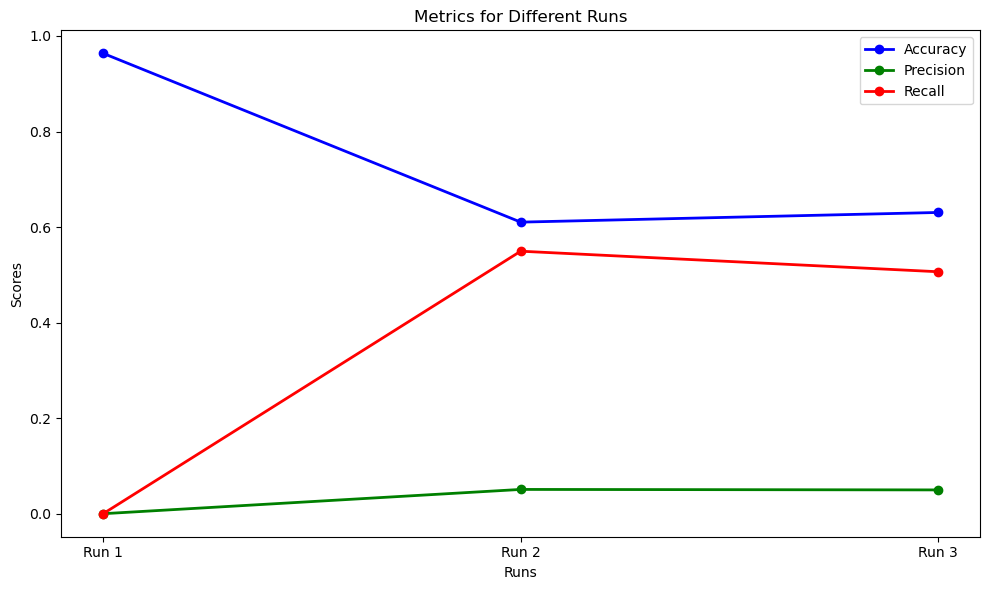

In [37]:
# Extracting values from metrics
accuracy_values = [metric['accuracy'] for metric in metrics]
precision_values = [metric['precision'] for metric in metrics]
recall_values = [metric['recall'] for metric in metrics]

# X-axis labels for the different runs
labels = ['Run 1', 'Run 2', 'Run 3']

# Set up the position of points (x-axis)
x = np.arange(len(labels))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lines for accuracy, precision, and recall
ax.plot(x, accuracy_values, label='Accuracy', marker='o', color='b', linestyle='-', linewidth=2)
ax.plot(x, precision_values, label='Precision', marker='o', color='g', linestyle='-', linewidth=2)
ax.plot(x, recall_values, label='Recall', marker='o', color='r', linestyle='-', linewidth=2)

# Add labels and title
ax.set_xlabel('Runs')
ax.set_ylabel('Scores')
ax.set_title('Metrics for Different Runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Findings:

1. The correlation between features and target column is too weak (greatest = 0.053813) thus a linear model cannot capture the complex relationship of the dataset

2. Giving more weights to target = 1 examples will encourage the model to emphasize on this minority example, improving recall, the ability of the model to output target = 1 predictions

3. Feature selection improves accuracy by reducing false positives, but this affects the model's ability to predict True positives